In [3]:
%load_ext autoreload
%autoreload 2

import sys
import os

%pip install ace_tools

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd

# Load the Excel file to review its contents
file_path = './Content_2024-09-03_2024-12-01_RiccardoTinivella.xlsx'
data = pd.ExcelFile(file_path)

# Display sheet names to understand the structure of the file
data.sheet_names


/home/tinix84/miniconda3/envs/icm/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


['DISCOVERY', 'ENGAGEMENT', 'TOP POSTS', 'FOLLOWERS', 'DEMOGRAPHICS']

In [7]:
# Load data from each sheet for analysis
discovery_df = data.parse('DISCOVERY')
engagement_df = data.parse('ENGAGEMENT')
top_posts_df = data.parse('TOP POSTS')
followers_df = data.parse('FOLLOWERS')
demographics_df = data.parse('DEMOGRAPHICS')

# Provide summaries of each sheet to identify key insights
discovery_summary = discovery_df.describe(include='all')
engagement_summary = engagement_df.describe(include='all')
top_posts_summary = top_posts_df.describe(include='all')
followers_summary = followers_df.describe(include='all')
demographics_summary = demographics_df.describe(include='all')

# Display the summaries to help user plan the marketing strategy
discovery_summary, engagement_summary, top_posts_summary, followers_summary, demographics_summary


(       Overall Performance  9/3/2024 - 12/1/2024
 count                    2              2.000000
 unique                   2                   NaN
 top            Impressions                   NaN
 freq                     1                   NaN
 mean                   NaN         233576.000000
 std                    NaN         212904.194961
 min                    NaN          83030.000000
 25%                    NaN         158303.000000
 50%                    NaN         233576.000000
 75%                    NaN         308849.000000
 max                    NaN         384122.000000,
             Date   Impressions  Engagements
 count         90     90.000000    90.000000
 unique        90           NaN          NaN
 top     9/3/2024           NaN          NaN
 freq           1           NaN          NaN
 mean         NaN   4268.022222    45.055556
 std          NaN   5090.137991    61.858004
 min          NaN      2.000000     0.000000
 25%          NaN     15.500000     0.0

In [10]:
engagement_df
engagement_df.to_csv('engagement.csv', index=False)

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Read the CSV file
df = pd.read_csv('engagement.csv', parse_dates=['Date'])

# Calculate key metrics
total_impressions = df['Impressions'].sum()
total_engagements = df['Engagements'].sum()
engagement_rate = (total_engagements / total_impressions) * 100

# Group by month
df['Month'] = df['Date'].dt.to_period('M')
monthly_summary = df.groupby('Month').agg({
    'Impressions': 'sum',
    'Engagements': 'sum'
}).reset_index()
monthly_summary['Engagement_Rate'] = (monthly_summary['Engagements'] / monthly_summary['Impressions']) * 100

# Find peak engagement days
peak_impressions = df.loc[df['Impressions'].idxmax()]
peak_engagements = df.loc[df['Engagements'].idxmax()]

def analyze_monthly_performance(monthly_summary):
    print("Monthly Performance Summary:")
    for _, row in monthly_summary.iterrows():
        print(f"{row['Month']}: ")
        print(f"  Total Impressions: {row['Impressions']:,}")
        print(f"  Total Engagements: {row['Engagements']:,}")
        print(f"  Engagement Rate: {row['Engagement_Rate']:.2f}%\n")

# Print the analysis
print(f"Total Analytics Overview:")
print(f"Total Impressions: {total_impressions:,}")
print(f"Total Engagements: {total_engagements:,}")
print(f"Overall Engagement Rate: {engagement_rate:.2f}%\n")

print(f"Peak Impression Day: {peak_impressions['Date'].date()} with {peak_impressions['Impressions']:,} impressions")
print(f"Peak Engagement Day: {peak_engagements['Date'].date()} with {peak_engagements['Engagements']} engagements\n")

analyze_monthly_performance(monthly_summary)

Total Analytics Overview:
Total Impressions: 384,122
Total Engagements: 4,055
Overall Engagement Rate: 1.06%

Peak Impression Day: 2024-10-31 with 26,798 impressions
Peak Engagement Day: 2024-10-31 with 341 engagements

Monthly Performance Summary:
2024-09: 
  Total Impressions: 359
  Total Engagements: 2
  Engagement Rate: 0.56%

2024-10: 
  Total Impressions: 147,651
  Total Engagements: 1,601
  Engagement Rate: 1.08%

2024-11: 
  Total Impressions: 235,673
  Total Engagements: 2,450
  Engagement Rate: 1.04%

2024-12: 
  Total Impressions: 439
  Total Engagements: 2
  Engagement Rate: 0.46%



Detailed Monthly Performance Analysis:

    2024-09
Name: 0, dtype: period[M] Performance:
  Total Impressions: 359
  Average Daily Impressions: 12.82
  Peak Daily Impressions: 44
  Total Engagements: 2
  Average Daily Engagements: 0.07
  Peak Daily Engagements: 1
  Engagement Rate:     0.56
Name: 0, dtype: object%

    2024-10
Name: 1, dtype: period[M] Performance:
  Total Impressions: 147,651
  Average Daily Impressions: 4762.94
  Peak Daily Impressions: 26,798
  Total Engagements: 1,601
  Average Daily Engagements: 51.65
  Peak Daily Engagements: 341
  Engagement Rate:     1.08
Name: 1, dtype: object%

    2024-11
Name: 2, dtype: period[M] Performance:
  Total Impressions: 235,673
  Average Daily Impressions: 7855.77
  Peak Daily Impressions: 17,399
  Total Engagements: 2,450
  Average Daily Engagements: 81.67
  Peak Daily Engagements: 212
  Engagement Rate:     1.04
Name: 2, dtype: object%

    2024-12
Name: 3, dtype: period[M] Performance:
  Total Impressions: 439
  Average Daily 

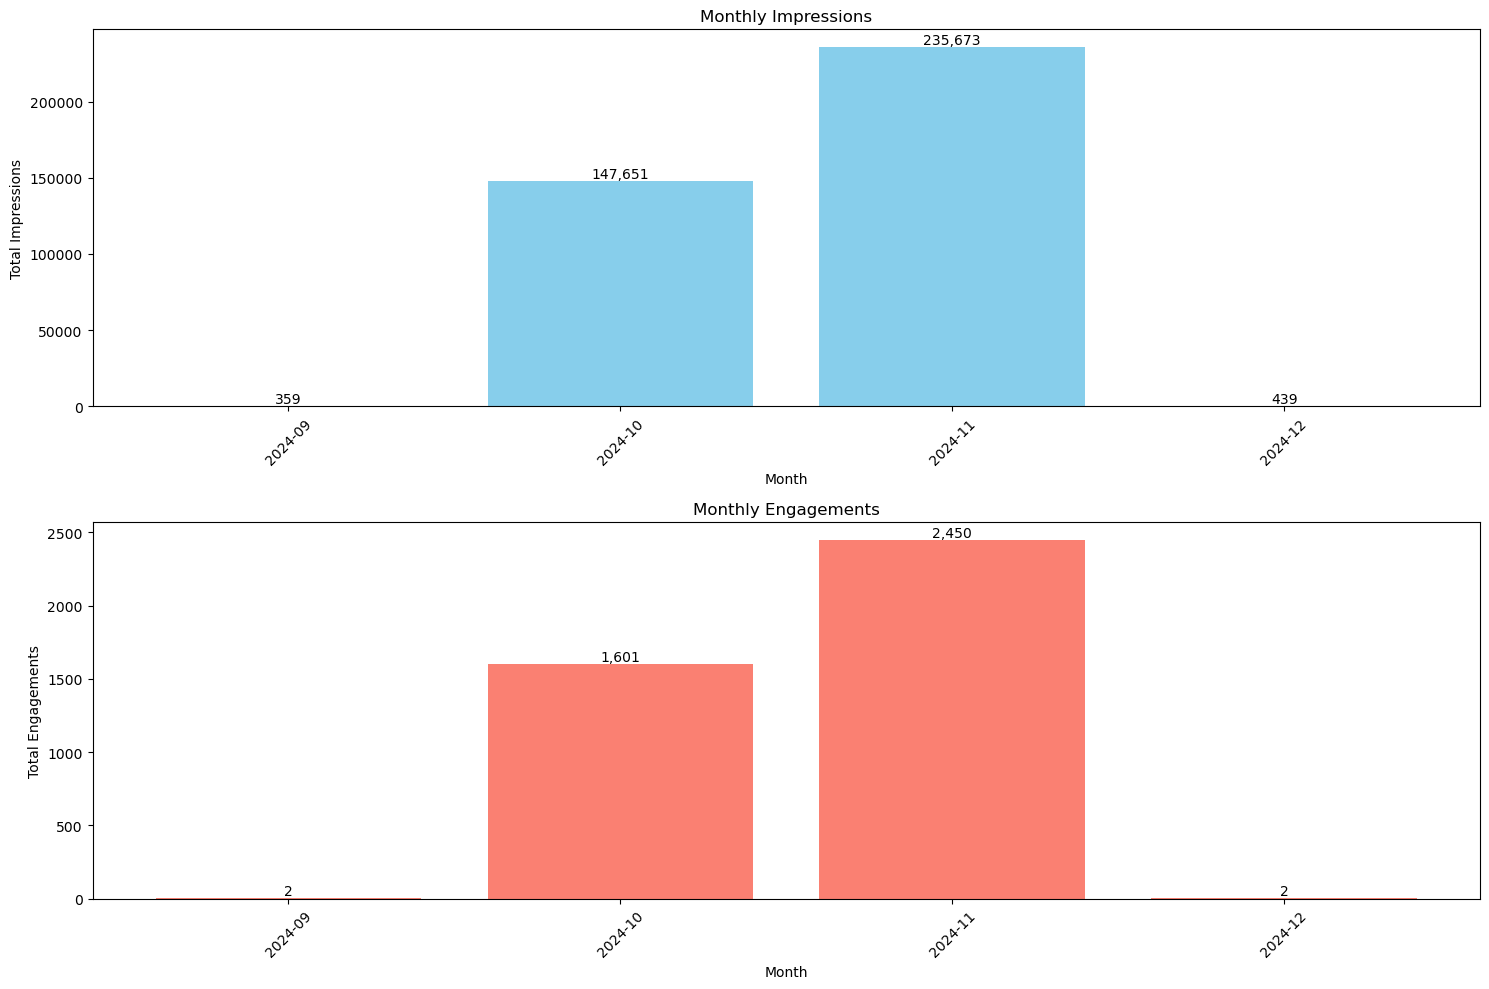

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
df = pd.read_csv('engagement.csv', parse_dates=['Date'])

# Create month-level analysis
df['Month'] = df['Date'].dt.to_period('M')
monthly_summary = df.groupby('Month').agg({
    'Impressions': ['sum', 'mean', 'max'],
    'Engagements': ['sum', 'mean', 'max']
}).reset_index()

# Calculate monthly engagement rates
monthly_summary['Engagement_Rate'] = (monthly_summary[('Engagements', 'sum')] / monthly_summary[('Impressions', 'sum')] * 100).round(2)

# Plotting
plt.figure(figsize=(15, 10))

# Impressions subplot
plt.subplot(2, 1, 1)
plt.bar(monthly_summary['Month'].astype(str), monthly_summary[('Impressions', 'sum')], color='skyblue')
plt.title('Monthly Impressions', fontsize=12)
plt.xlabel('Month')
plt.ylabel('Total Impressions')
plt.xticks(rotation=45)
for i, v in enumerate(monthly_summary[('Impressions', 'sum')]):
    plt.text(i, v, f'{v:,}', ha='center', va='bottom')

# Engagements subplot
plt.subplot(2, 1, 2)
plt.bar(monthly_summary['Month'].astype(str), monthly_summary[('Engagements', 'sum')], color='salmon')
plt.title('Monthly Engagements', fontsize=12)
plt.xlabel('Month')
plt.ylabel('Total Engagements')
plt.xticks(rotation=45)
for i, v in enumerate(monthly_summary[('Engagements', 'sum')]):
    plt.text(i, v, f'{v:,}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('monthly_performance.png')

# Print detailed analysis
print("Detailed Monthly Performance Analysis:")
for _, row in monthly_summary.iterrows():
    month = row['Month']
    print(f"\n{month} Performance:")
    print(f"  Total Impressions: {row[('Impressions', 'sum')]:,}")
    print(f"  Average Daily Impressions: {row[('Impressions', 'mean')]:.2f}")
    print(f"  Peak Daily Impressions: {row[('Impressions', 'max')]:,}")
    print(f"  Total Engagements: {row[('Engagements', 'sum')]:,}")
    print(f"  Average Daily Engagements: {row[('Engagements', 'mean')]:.2f}")
    print(f"  Peak Daily Engagements: {row[('Engagements', 'max')]}")
    print(f"  Engagement Rate: {row['Engagement_Rate']}%")

Significant Performance Spikes:

Impression Spikes:
Date: 2024-10-31, Impressions: 26,798
Date: 2024-11-01, Impressions: 16,068
Date: 2024-11-02, Impressions: 15,803
Date: 2024-11-23, Impressions: 17,399

Engagement Spikes:
Date: 2024-10-31, Engagements: 341
Date: 2024-11-01, Engagements: 212
Date: 2024-11-02, Engagements: 188
Date: 2024-11-07, Engagements: 192
Date: 2024-11-23, Engagements: 182

Correlation between Impressions and Engagements:
Pearson Correlation Coefficient: 0.97


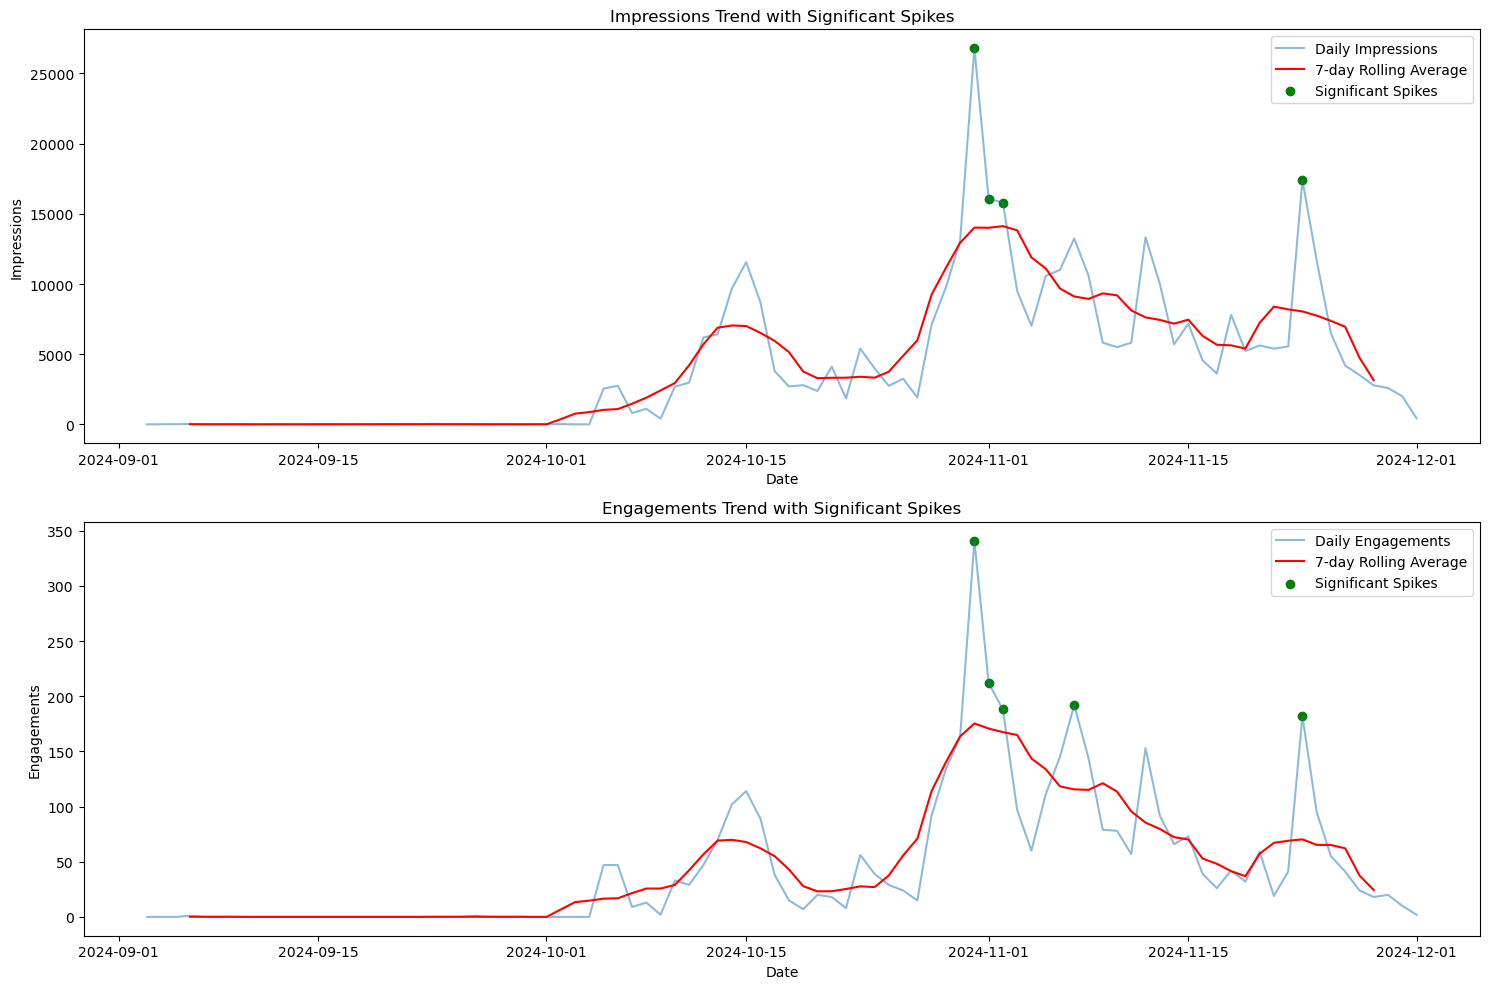

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
df = pd.read_csv('engagement.csv', parse_dates=['Date'])

# Calculate rolling averages and day-to-day changes
df['Impressions_Rolling_Avg_7day'] = df['Impressions'].rolling(window=7, center=True).mean()
df['Engagements_Rolling_Avg_7day'] = df['Engagements'].rolling(window=7, center=True).mean()

# Identify significant spikes
def identify_spikes(series, threshold=2):
    mean = series.mean()
    std = series.std()
    return series > (mean + threshold * std)

impressions_spikes = identify_spikes(df['Impressions'])
engagements_spikes = identify_spikes(df['Engagements'])

# Plotting
plt.figure(figsize=(15, 10))

# Impressions trend
plt.subplot(2, 1, 1)
plt.plot(df['Date'], df['Impressions'], label='Daily Impressions', alpha=0.5)
plt.plot(df['Date'], df['Impressions_Rolling_Avg_7day'], label='7-day Rolling Average', color='red')
plt.scatter(df.loc[impressions_spikes, 'Date'], 
            df.loc[impressions_spikes, 'Impressions'], 
            color='green', label='Significant Spikes')
plt.title('Impressions Trend with Significant Spikes', fontsize=12)
plt.xlabel('Date')
plt.ylabel('Impressions')
plt.legend()

# Engagements trend
plt.subplot(2, 1, 2)
plt.plot(df['Date'], df['Engagements'], label='Daily Engagements', alpha=0.5)
plt.plot(df['Date'], df['Engagements_Rolling_Avg_7day'], label='7-day Rolling Average', color='red')
plt.scatter(df.loc[engagements_spikes, 'Date'], 
            df.loc[engagements_spikes, 'Engagements'], 
            color='green', label='Significant Spikes')
plt.title('Engagements Trend with Significant Spikes', fontsize=12)
plt.xlabel('Date')
plt.ylabel('Engagements')
plt.legend()

plt.tight_layout()
plt.savefig('performance_spikes.png')

# Detailed spike analysis
print("Significant Performance Spikes:")
print("\nImpression Spikes:")
spike_impressions = df[impressions_spikes]
for _, row in spike_impressions.iterrows():
    print(f"Date: {row['Date'].date()}, Impressions: {row['Impressions']:,}")

print("\nEngagement Spikes:")
spike_engagements = df[engagements_spikes]
for _, row in spike_engagements.iterrows():
    print(f"Date: {row['Date'].date()}, Engagements: {row['Engagements']}")

# Correlation analysis
print("\nCorrelation between Impressions and Engagements:")
correlation = df['Impressions'].corr(df['Engagements'])
print(f"Pearson Correlation Coefficient: {correlation:.2f}")

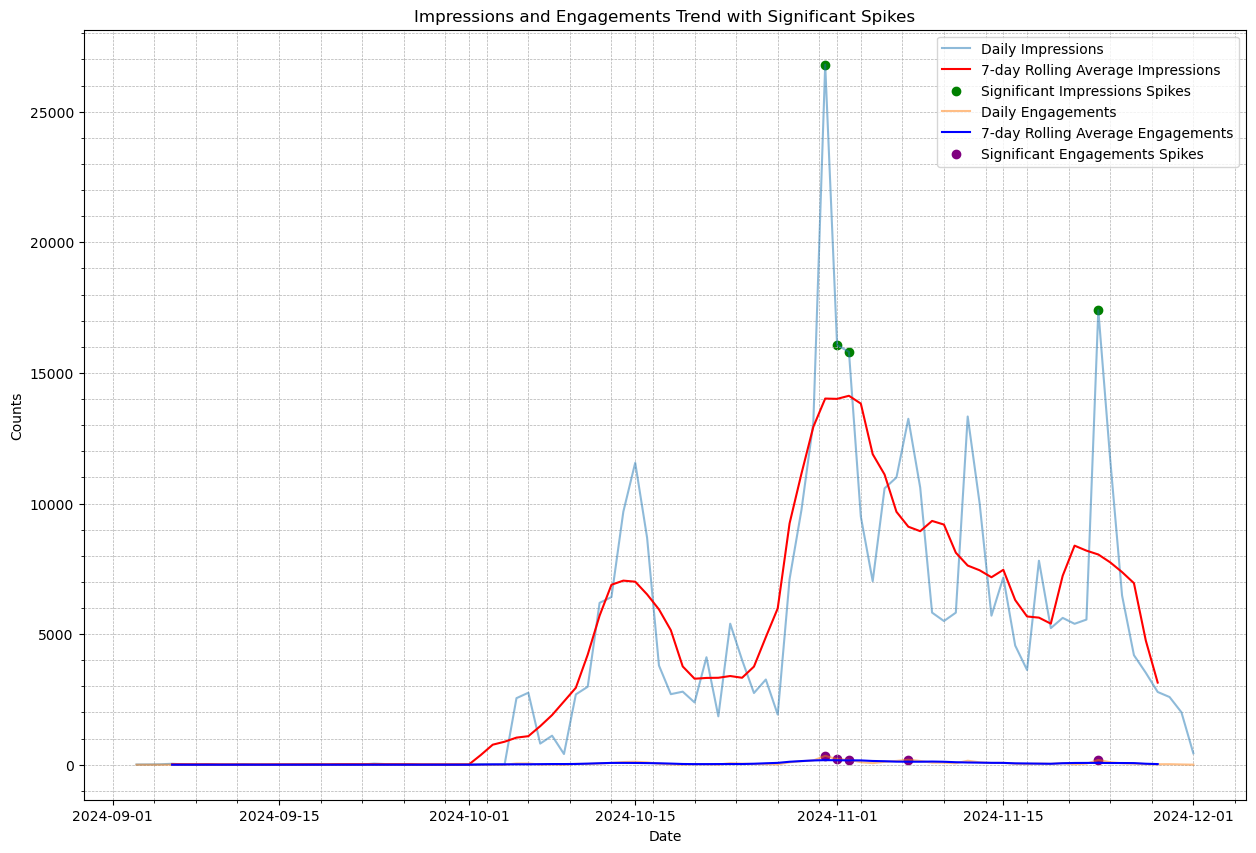

In [19]:
# Plotting
plt.figure(figsize=(15, 10))

# Combined trend
plt.plot(df['Date'], df['Impressions'], label='Daily Impressions', alpha=0.5)
plt.plot(df['Date'], df['Impressions_Rolling_Avg_7day'], label='7-day Rolling Average Impressions', color='red')
plt.scatter(df.loc[impressions_spikes, 'Date'], 
            df.loc[impressions_spikes, 'Impressions'], 
            color='green', label='Significant Impressions Spikes')

plt.plot(df['Date'], df['Engagements'], label='Daily Engagements', alpha=0.5)
plt.plot(df['Date'], df['Engagements_Rolling_Avg_7day'], label='7-day Rolling Average Engagements', color='blue')
plt.scatter(df.loc[engagements_spikes, 'Date'], 
            df.loc[engagements_spikes, 'Engagements'], 
            color='purple', label='Significant Engagements Spikes')

plt.title('Impressions and Engagements Trend with Significant Spikes', fontsize=12)
plt.xlabel('Date')
plt.ylabel('Counts')
plt.legend()

# Add grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()

plt.show()

Correlation Matrix Breakdown:
               Impressions  Engagements     Month  Week_of_Month
Impressions       1.000000     0.972973  0.580343       0.579502
Engagements       0.972973     1.000000  0.495111       0.477050
Month             0.580343     0.495111  1.000000       0.938999
Week_of_Month     0.579502     0.477050  0.938999       1.000000

Impressions and Engagements Correlation:
Correlation Coefficient: 0.9730
P-value: 0.0000


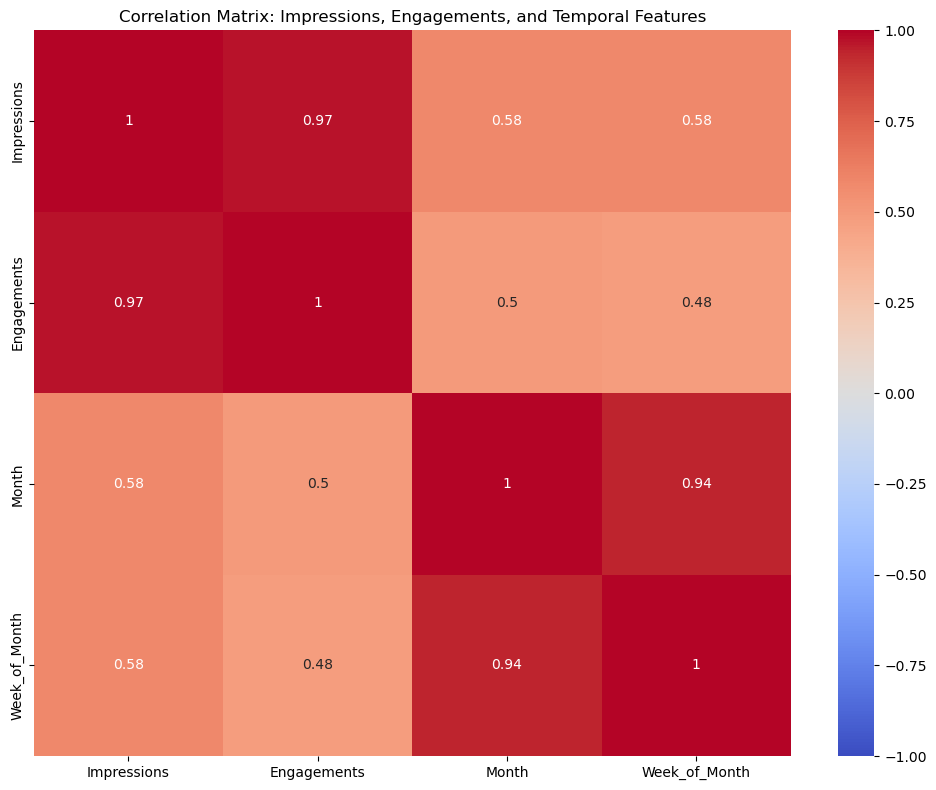

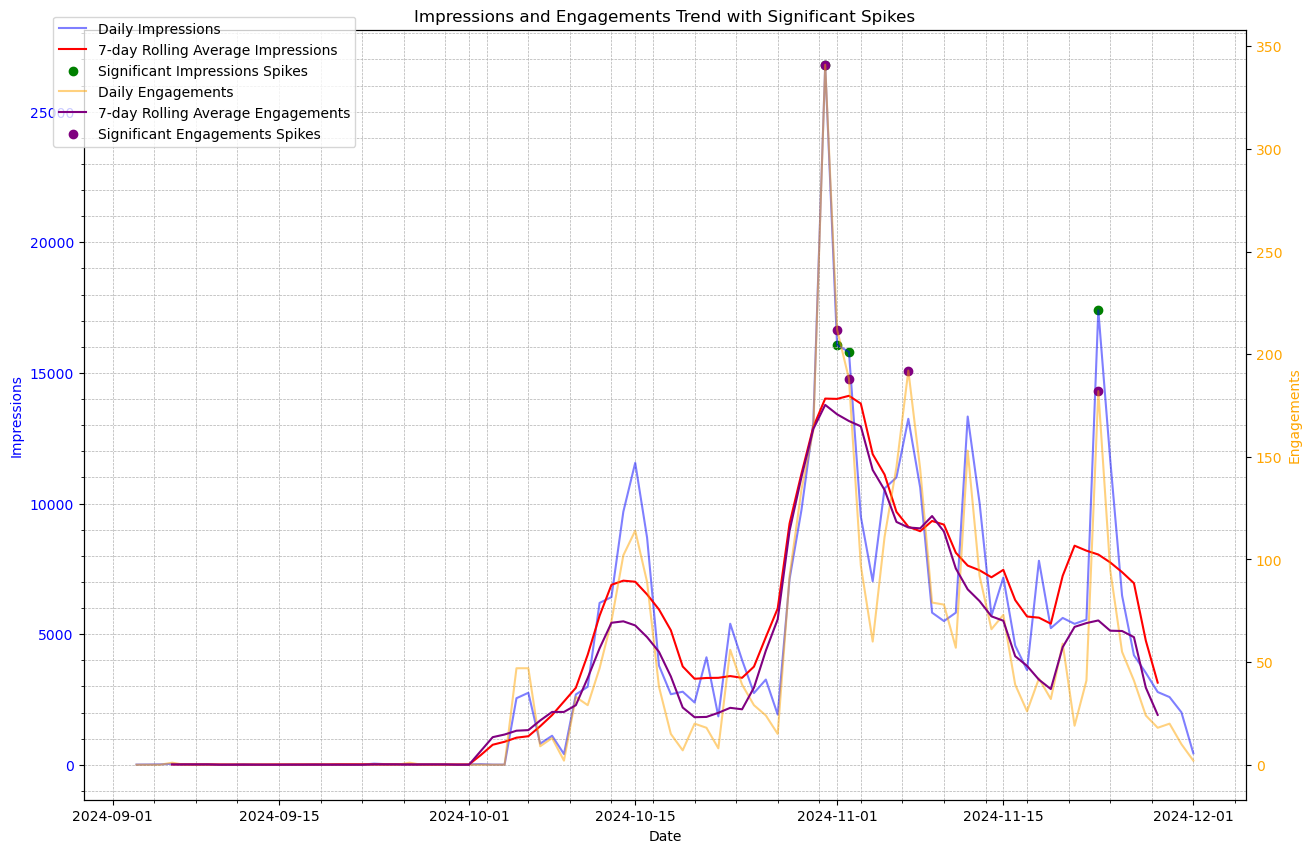

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('engagement.csv', parse_dates=['Date'])

# Create additional features for correlation analysis
df['Day_of_Week'] = df['Date'].dt.day_name()
df['Month'] = df['Date'].dt.month
df['Week_of_Month'] = df['Date'].dt.isocalendar().week

# Create correlation matrix
correlation_features = ['Impressions', 'Engagements', 'Month', 'Week_of_Month']
correlation_matrix = df[correlation_features].corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Correlation Matrix: Impressions, Engagements, and Temporal Features')
plt.tight_layout()
plt.savefig('correlation_matrix.png')

# Print detailed correlation insights
print("Correlation Matrix Breakdown:")
print(correlation_matrix)

# Statistical significance of correlations
from scipy import stats

def calculate_correlation_significance(x, y):
    correlation, p_value = stats.pearsonr(x, y)
    return {
        'correlation': correlation,
        'p_value': p_value,
        'statistically_significant': p_value < 0.05
    }

# Correlation between Impressions and Engagements
correlation_analysis = calculate_correlation_significance(df['Impressions'], df['Engagements'])
print("\nImpressions and Engagements Correlation:")
print(f"Correlation Coefficient: {correlation_analysis['correlation']:.4f}")
print(f"P-value: {correlation_analysis['p_value']:.4f}")

# Plotting with primary and secondary y-axes
fig, ax1 = plt.subplots(figsize=(15, 10))

# Primary y-axis for Impressions
ax1.plot(df['Date'], df['Impressions'], label='Daily Impressions', alpha=0.5, color='blue')
ax1.plot(df['Date'], df['Impressions'].rolling(window=7, center=True).mean(), label='7-day Rolling Average Impressions', color='red')
ax1.scatter(df.loc[identify_spikes(df['Impressions']), 'Date'], 
            df.loc[identify_spikes(df['Impressions']), 'Impressions'], 
            color='green', label='Significant Impressions Spikes')
ax1.set_xlabel('Date')
ax1.set_ylabel('Impressions', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Secondary y-axis for Engagements
ax2 = ax1.twinx()
ax2.plot(df['Date'], df['Engagements'], label='Daily Engagements', alpha=0.5, color='orange')
ax2.plot(df['Date'], df['Engagements'].rolling(window=7, center=True).mean(), label='7-day Rolling Average Engagements', color='purple')
ax2.scatter(df.loc[identify_spikes(df['Engagements']), 'Date'], 
            df.loc[identify_spikes(df['Engagements']), 'Engagements'], 
            color='purple', label='Significant Engagements Spikes')
ax2.set_ylabel('Engagements', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add grid
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
ax1.minorticks_on()

# Add legends
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

plt.title('Impressions and Engagements Trend with Significant Spikes', fontsize=12)
plt.show()

Correlation Matrix Breakdown:
               Impressions  Engagements     Month  Week_of_Month
Impressions       1.000000     0.972973  0.580343       0.579502
Engagements       0.972973     1.000000  0.495111       0.477050
Month             0.580343     0.495111  1.000000       0.938999
Week_of_Month     0.579502     0.477050  0.938999       1.000000

Impressions and Engagements Correlation:
Correlation Coefficient: 0.9730
P-value: 0.0000


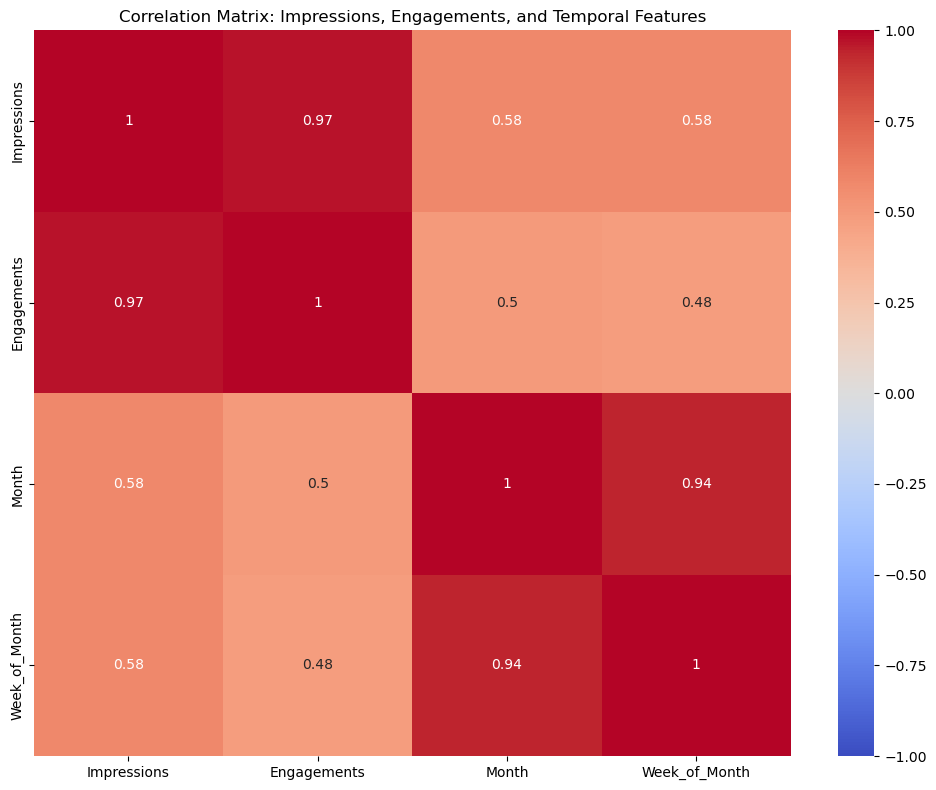

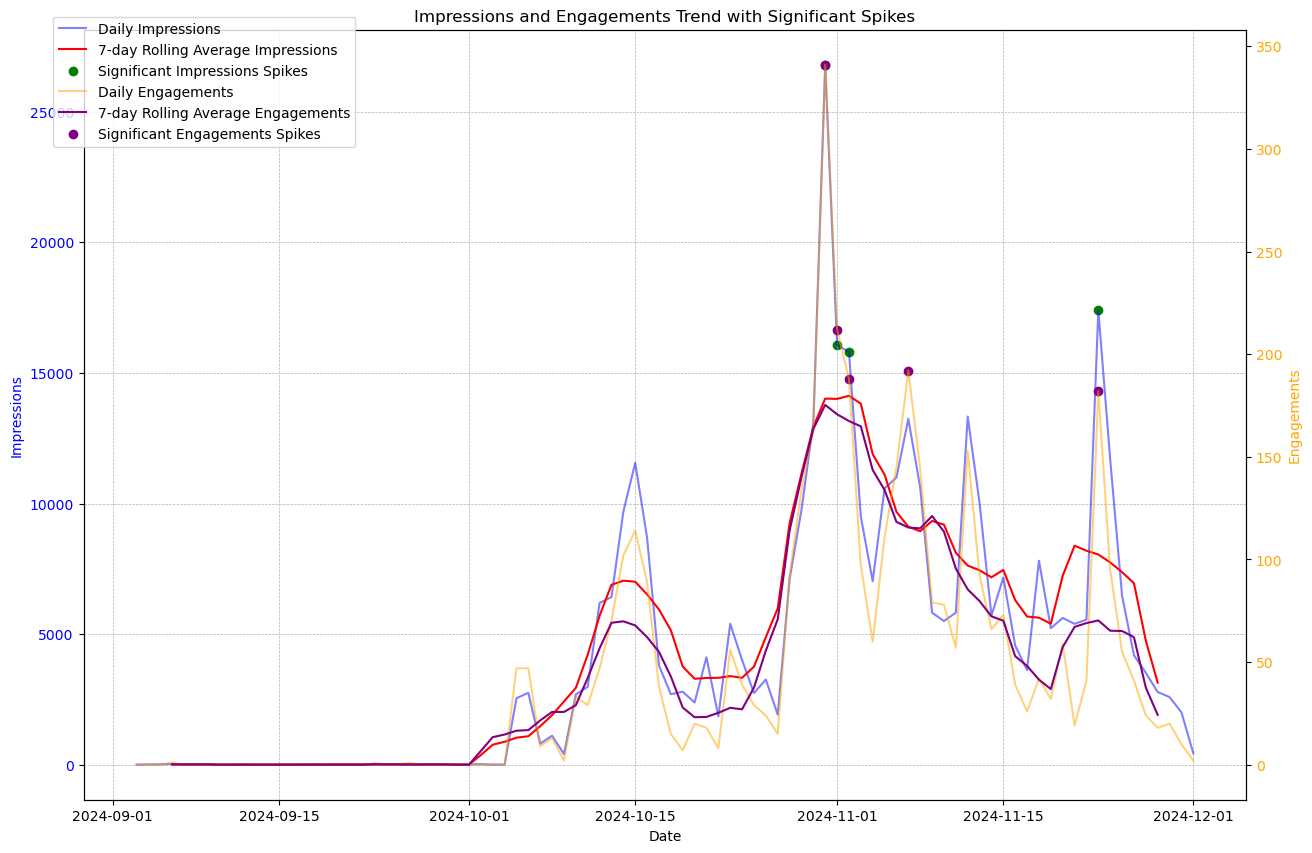

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('engagement.csv', parse_dates=['Date'])

# Create additional features for correlation analysis
df['Day_of_Week'] = df['Date'].dt.day_name()
df['Month'] = df['Date'].dt.month
df['Week_of_Month'] = df['Date'].dt.isocalendar().week

# Create correlation matrix
correlation_features = ['Impressions', 'Engagements', 'Month', 'Week_of_Month']
correlation_matrix = df[correlation_features].corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Correlation Matrix: Impressions, Engagements, and Temporal Features')
plt.tight_layout()
plt.savefig('correlation_matrix.png')

# Print detailed correlation insights
print("Correlation Matrix Breakdown:")
print(correlation_matrix)

# Statistical significance of correlations
from scipy import stats

def calculate_correlation_significance(x, y):
    correlation, p_value = stats.pearsonr(x, y)
    return {
        'correlation': correlation,
        'p_value': p_value,
        'statistically_significant': p_value < 0.05
    }

# Correlation between Impressions and Engagements
correlation_analysis = calculate_correlation_significance(df['Impressions'], df['Engagements'])
print("\nImpressions and Engagements Correlation:")
print(f"Correlation Coefficient: {correlation_analysis['correlation']:.4f}")
print(f"P-value: {correlation_analysis['p_value']:.4f}")

# Plotting with primary and secondary y-axes
fig, ax1 = plt.subplots(figsize=(15, 10))

# Primary y-axis for Impressions
ax1.plot(df['Date'], df['Impressions'], label='Daily Impressions', alpha=0.5, color='blue')
ax1.plot(df['Date'], df['Impressions'].rolling(window=7, center=True).mean(), label='7-day Rolling Average Impressions', color='red')
ax1.scatter(df.loc[identify_spikes(df['Impressions']), 'Date'], 
            df.loc[identify_spikes(df['Impressions']), 'Impressions'], 
            color='green', label='Significant Impressions Spikes')
ax1.set_xlabel('Date')
ax1.set_ylabel('Impressions', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Secondary y-axis for Engagements
ax2 = ax1.twinx()
ax2.plot(df['Date'], df['Engagements'], label='Daily Engagements', alpha=0.5, color='orange')
ax2.plot(df['Date'], df['Engagements'].rolling(window=7, center=True).mean(), label='7-day Rolling Average Engagements', color='purple')
ax2.scatter(df.loc[identify_spikes(df['Engagements']), 'Date'], 
            df.loc[identify_spikes(df['Engagements']), 'Engagements'], 
            color='purple', label='Significant Engagements Spikes')
ax2.set_ylabel('Engagements', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add grid every day
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
# ax1.minorticks_on()

# Add legends
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

plt.title('Impressions and Engagements Trend with Significant Spikes', fontsize=12)
plt.show()

Correlation Matrix Breakdown:
                       Impressions  Engagements     Month  Week_of_Month  \
Impressions               1.000000     0.972973  0.580343       0.579502   
Engagements               0.972973     1.000000  0.495111       0.477050   
Month                     0.580343     0.495111  1.000000       0.938999   
Week_of_Month             0.579502     0.477050  0.938999       1.000000   
Day_of_Week_Friday       -0.031129    -0.011161  0.016102      -0.007387   
Day_of_Week_Monday       -0.014718    -0.056148 -0.021033       0.045835   
Day_of_Week_Saturday      0.030851     0.019154  0.016102      -0.007387   
Day_of_Week_Sunday       -0.070131    -0.069737  0.054237      -0.007387   
Day_of_Week_Thursday      0.056290     0.082868 -0.022034      -0.007387   
Day_of_Week_Tuesday       0.013673     0.010419 -0.022034      -0.007387   
Day_of_Week_Wednesday     0.014678     0.022751 -0.022034      -0.007387   

                       Day_of_Week_Friday  Day_of_Week_Mo

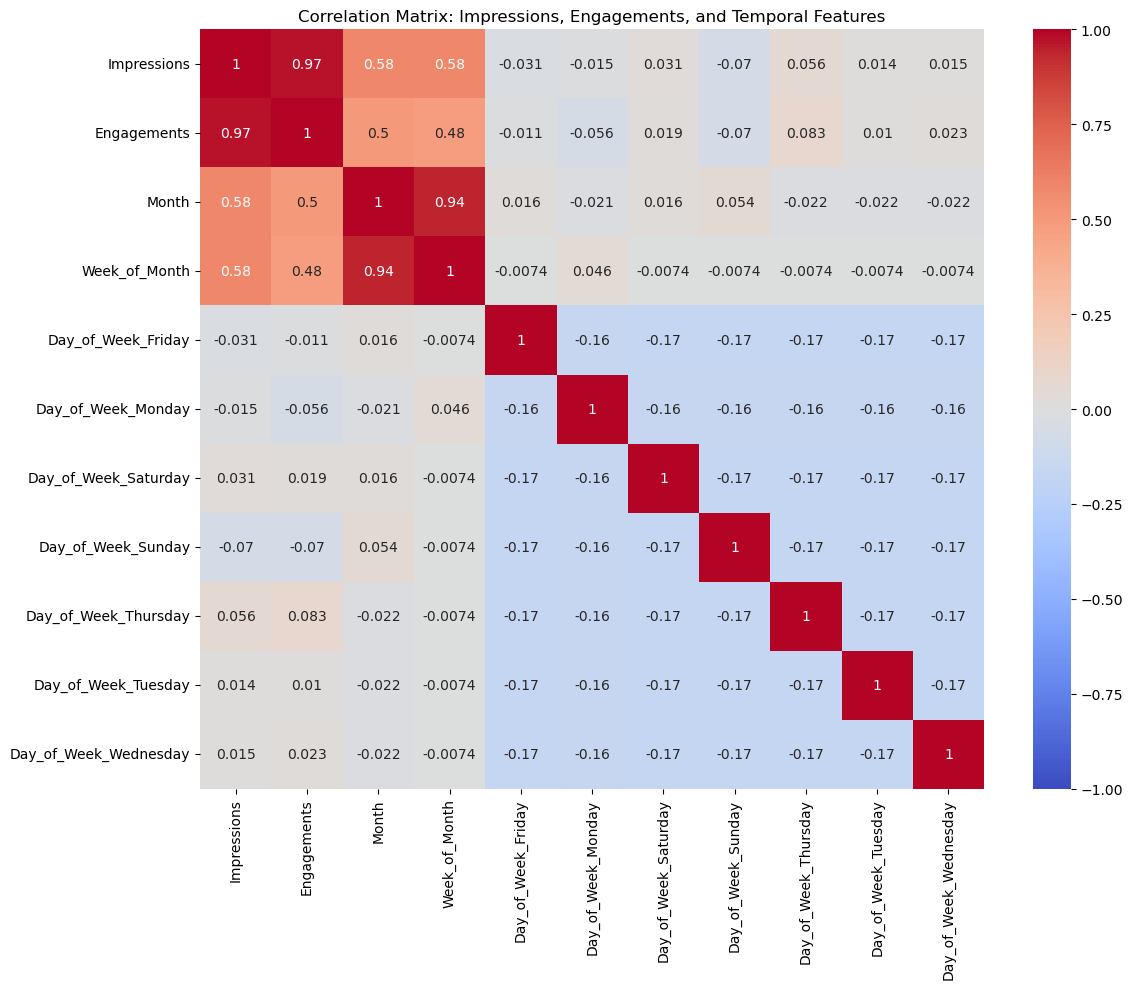

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Read the CSV file
df = pd.read_csv('engagement.csv', parse_dates=['Date'])

# Create additional features for correlation analysis
df['Day_of_Week'] = df['Date'].dt.day_name()
df['Month'] = df['Date'].dt.month
df['Week_of_Month'] = df['Date'].dt.isocalendar().week

# One-hot encode the day of the week
df = pd.get_dummies(df, columns=['Day_of_Week'])

# Create correlation matrix
correlation_features = ['Impressions', 'Engagements', 'Month', 'Week_of_Month'] + [col for col in df.columns if col.startswith('Day_of_Week_')]
correlation_matrix = df[correlation_features].corr()

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Correlation Matrix: Impressions, Engagements, and Temporal Features')
plt.tight_layout()
plt.savefig('correlation_matrix.png')

# Print detailed correlation insights
print("Correlation Matrix Breakdown:")
print(correlation_matrix)

# Statistical significance of correlations
def calculate_correlation_significance(x, y):
    correlation, p_value = stats.pearsonr(x, y)
    return {
        'correlation': correlation,
        'p_value': p_value,
        'statistically_significant': p_value < 0.05
    }

# Correlation between Impressions and Engagements with Day of the Week
day_of_week_columns = [col for col in df.columns if col.startswith('Day_of_Week_')]
for col in day_of_week_columns:
    correlation_analysis_impressions = calculate_correlation_significance(df['Impressions'], df[col])
    correlation_analysis_engagements = calculate_correlation_significance(df['Engagements'], df[col])
    print(f"\nImpressions and {col} Correlation:")
    print(f"Correlation Coefficient: {correlation_analysis_impressions['correlation']:.4f}")
    print(f"P-value: {correlation_analysis_impressions['p_value']:.4f}")
    print(f"Statistically Significant: {correlation_analysis_impressions['statistically_significant']}")
    
    print(f"\nEngagements and {col} Correlation:")
    print(f"Correlation Coefficient: {correlation_analysis_engagements['correlation']:.4f}")
    print(f"P-value: {correlation_analysis_engagements['p_value']:.4f}")
    print(f"Statistically Significant: {correlation_analysis_engagements['statistically_significant']}")

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Read the CSV file
df = pd.read_csv('engagement.csv', parse_dates=['Date'])

# Create additional features for correlation analysis
df['Day_of_Week'] = df['Date'].dt.day_name()
df['Month'] = df['Date'].dt.month
df['Week_of_Month'] = df['Date'].dt.isocalendar().week

# One-hot encode the day of the week
df = pd.get_dummies(df, columns=['Day_of_Week'])

# Create correlation matrix
correlation_features = ['Impressions', 'Engagements', 'Month', 'Week_of_Month'] + [col for col in df.columns if col.startswith('Day_of_Week_')]
correlation_matrix = df[correlation_features].corr()

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Correlation Matrix: Impressions, Engagements, and Temporal Features')
plt.tight_layout()
plt.savefig('correlation_matrix.png')

# Print detailed correlation insights
print("Correlation Matrix Breakdown:")
print(correlation_matrix)

# Statistical significance of correlations
def calculate_correlation_significance(x, y):
    correlation, p_value = stats.pearsonr(x, y)
    return {
        'correlation': correlation,
        'p_value': p_value,
        'statistically_significant': p_value < 0.05
    }

# Correlation between Impressions and Engagements with Day of the Week
day_of_week_columns = [col for col in df.columns if col.startswith('Day_of_Week_')]
for col in day_of_week_columns:
    correlation_analysis_impressions = calculate_correlation_significance(df['Impressions'], df[col])
    correlation_analysis_engagements = calculate_correlation_significance(df['Engagements'], df[col])
    print(f"\nImpressions and {col} Correlation:")
    print(f"Correlation Coefficient: {correlation_analysis_impressions['correlation']:.4f}")
    print(f"P-value: {correlation_analysis_impressions['p_value']:.4f}")
    print(f"Statistically Significant: {correlation_analysis_impressions['statistically_significant']}")
    
    print(f"\nEngagements and {col} Correlation:")
    print(f"Correlation Coefficient: {correlation_analysis_engagements['correlation']:.4f}")
    print(f"P-value: {correlation_analysis_engagements['p_value']:.4f}")
    print(f"Statistically Significant: {correlation_analysis_engagements['statistically_significant']}")

/home/tinix84/miniconda3/envs/icm/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/tmp/ipykernel_5258/3324226977.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_engagement_posts["Date"] = pd.to_datetime(high_engagement_posts["Date"], errors='coerce')


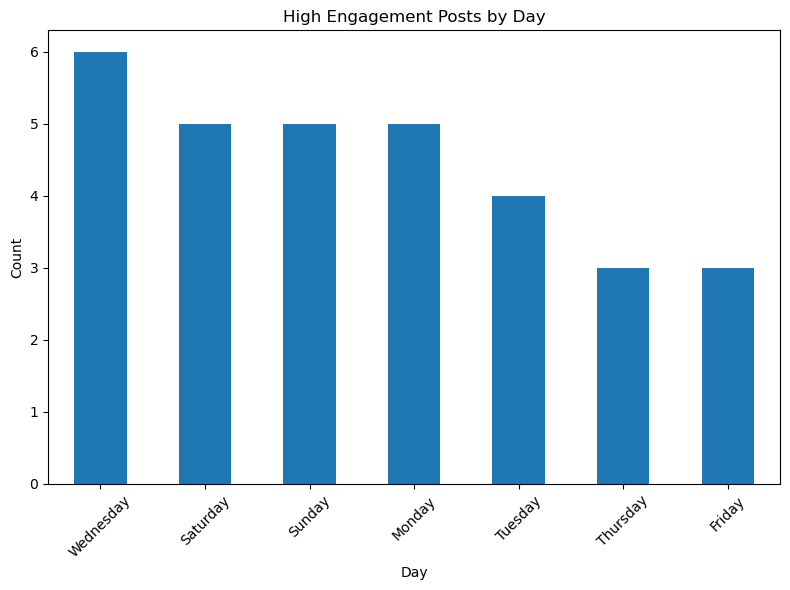

ValueError: x and y must be the same size

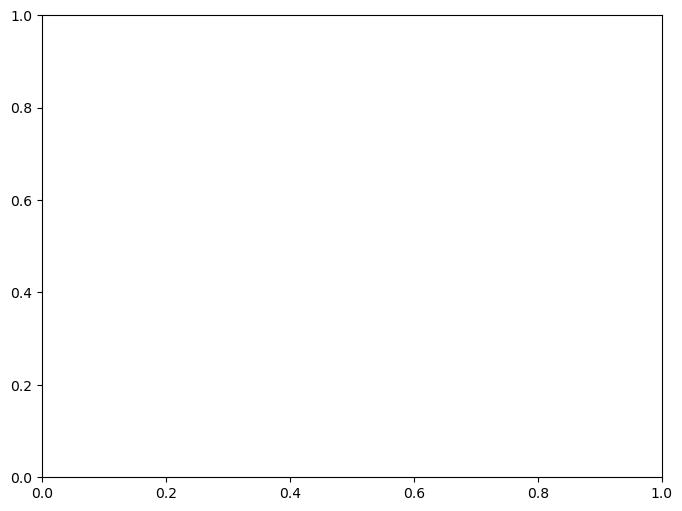

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset (replace 'file_path' with the actual path to your dataset)
file_path = 'Content_2024-09-03_2024-12-01_RiccardoTinivella.xlsx'
data = pd.ExcelFile(file_path)

# Load data from sheets
discovery_df = data.parse('DISCOVERY')
engagement_df = data.parse('ENGAGEMENT')
top_posts_df = data.parse('TOP POSTS')
followers_df = data.parse('FOLLOWERS')
demographics_df = data.parse('DEMOGRAPHICS')

# Step 1: Identify trends in engagement and underperforming content
low_engagement_posts = engagement_df[engagement_df["Engagements"] < engagement_df["Engagements"].mean()]
high_engagement_posts = engagement_df[engagement_df["Engagements"] >= engagement_df["Engagements"].mean()]

# Analyze common traits in high engagement posts
if "Date" in high_engagement_posts:
    high_engagement_posts["Date"] = pd.to_datetime(high_engagement_posts["Date"], errors='coerce')

posting_days = high_engagement_posts["Date"].dt.day_name().value_counts()
impressions = high_engagement_posts["Impressions"]
# engagement_rate = high_engagement_posts["Engagement Rate"]

# Plot 1: Distribution of posting days
plt.figure(figsize=(8, 6))
posting_days.plot(kind='bar', title="High Engagement Posts by Day", xlabel="Day", ylabel="Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 2: Impressions vs. Engagement Rate
plt.figure(figsize=(8, 6))
plt.scatter(impressions, engagement_rate, alpha=0.7, color='orange')
plt.title("Impressions vs. Engagement Rate")
plt.xlabel("Impressions")
plt.ylabel("Engagement Rate (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 3: Engagement rate distribution
plt.figure(figsize=(8, 6))
engagement_rate.plot(kind='hist', bins=10, color='green', title="Distribution of Engagement Rates")
plt.xlabel("Engagement Rate (%)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [8]:
# Summarize key engagement trends
engagement_trends = {
    "Total Posts": engagement_df.shape[0],
    "Total Engagements": engagement_df["Engagements"].sum() if "Engagements" in engagement_df else None,
    "Average Engagement per Post": engagement_df["Engagements"].mean() if "Engagements" in engagement_df else None,
    "Top Engagement Rate": engagement_df["Engagement Rate"].max() if "Engagement Rate" in engagement_df else None,
    "Lowest Engagement Rate": engagement_df["Engagement Rate"].min() if "Engagement Rate" in engagement_df else None,
    "Engagement Rate Trend": engagement_df["Engagement Rate"].describe() if "Engagement Rate" in engagement_df else None,
}

engagement_trends


{'Total Posts': 90,
 'Total Engagements': 4055,
 'Average Engagement per Post': 45.05555555555556,
 'Top Engagement Rate': None,
 'Lowest Engagement Rate': None,
 'Engagement Rate Trend': None}

In [ ]:
# Ensure the "Date" column is in datetime format
if "Date" in high_engagement_posts:
    high_engagement_posts["Date"] = pd.to_datetime(high_engagement_posts["Date"], errors='coerce')

# Retry identifying common traits in high-engagement posts
common_traits = {}

if "Date" in high_engagement_posts:
    common_traits["Posting Days"] = high_engagement_posts["Date"].dt.day_name().value_counts()

if "Impressions" in high_engagement_posts:
    common_traits["Average Impressions"] = high_engagement_posts["Impressions"].mean()

if "Engagement Rate" in high_engagement_posts:
    common_traits["Average Engagement Rate"] = high_engagement_posts["Engagement Rate"].mean()

if "Content Type" in high_engagement_posts:
    common_traits["Most Used Content Types"] = high_engagement_posts["Content Type"].value_counts()

common_traits


In [ ]:
# Save the plots as images to share with the user
output_paths = [
    '/mnt/data/High_Engagement_Posts_by_Day.png',
    '/mnt/data/Impressions_vs_Engagement_Rate.png',
    '/mnt/data/Engagement_Rate_Distribution.png'
]

# Plot 1: Distribution of posting days
plt.figure(figsize=(8, 6))
posting_days.plot(kind='bar', title="High Engagement Posts by Day", xlabel="Day", ylabel="Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(output_paths[0])
plt.close()

# Plot 2: Impressions vs. Engagement Rate
plt.figure(figsize=(8, 6))
plt.scatter(impressions, engagement_rate, alpha=0.7, color='orange')
plt.title("Impressions vs. Engagement Rate")
plt.xlabel("Impressions")
plt.ylabel("Engagement Rate (%)")
plt.grid(True)
plt.tight_layout()
plt.savefig(output_paths[1])
plt.close()

# Plot 3: Engagement rate distribution
plt.figure(figsize=(8, 6))
engagement_rate.plot(kind='hist', bins=10, color='green', title="Distribution of Engagement Rates")
plt.xlabel("Engagement Rate (%)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig(output_paths[2])
plt.close()

output_paths
